# Recognize device

In [ ]:
import torch

In [ ]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Read data file 

用 excel 建一個 data file:

x = RAND(), x2=RANDBETWEEN(-100, 100)/100, x3=RANDBETWEEN(-100, 100)/100

y = 2*x1^2 + 5*x2^3 + 6*x3

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data-y=f(x1, x2, x3).xlsx to data-y=f(x1, x2, x3).xlsx


In [ ]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

data-y=f(x1, x2, x3).xlsx


In [ ]:
import pandas as pd
df=pd.read_excel(fname)

In [ ]:
df.head(5)

,x1,x2,x3,y
0,0.627431,-0.04,-0.73,-3.592980
1,0.054560,-0.39,-0.88,-5.570641
2,0.212407,0.26,-0.77,-4.441887
3,0.858315,-0.32,0.77,5.929569
4,0.758817,0.21,-0.26,-0.362090


In [ ]:
df.columns

Index(['x1', 'x2', 'x3', 'y'], dtype='object')

# Convert training data to tensor

In [ ]:
dfX = df[['x1', "x2", "x3"]]]
print(dfX.shape)

In [ ]:
tensorX = torch.FloatTensor(dfX.values).to(device)
print(tensorX.shape)

torch.Size([100, 3])


In [ ]:
dfY = df['y']
print(dfY.shape)

(100,)


In [ ]:
tensorY = torch.FloatTensor(dfY.values).to(device)
tensorY = tensorY.view(tensorY.shape[0], 1)
print(tensorY.shape)

torch.Size([100, 1])


# Build NN

In [ ]:
import torch.nn as nn

In [ ]:
MyNet = nn.Sequential(
    nn.Linear(3, 30),
    nn.ReLU(inplace = True),
    nn.Linear(30, 15),
    nn.ReLU(inplace = True),
    nn.Linear(15, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=3, out_features=30, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=15, out_features=1, bias=True)
)


In [ ]:
loss_func = torch.nn.MSELoss()

In [ ]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.05)

# 練習 one training 

In [ ]:
tensorY1 = MyNet(tensorX)
loss = loss_func(tensorY1, tensorY)
print(float(loss))
optimizer.zero_grad()
loss.backward()
optimizer.step()

14.66377067565918


# Training Loop

In [ ]:
lossLst = []
for epoch in range(1, 30):
    tensorY1 = MyNet(tensorX)
    loss = loss_func(tensorY1, tensorY)
    loss1 = float(loss)
    print("%.2f" % (loss1), end = ", ")
    lossLst.append(loss1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

13.11, 11.04, 8.49, 6.21, 4.99, 3.44, 2.47, 2.68, 2.78, 2.71, 2.71, 2.09, 1.46, 1.22, 1.14, 1.11, 1.20, 1.34, 1.34, 1.23, 1.14, 1.07, 0.97, 0.89, 0.86, 0.83, 0.73, 0.64, 0.62, 

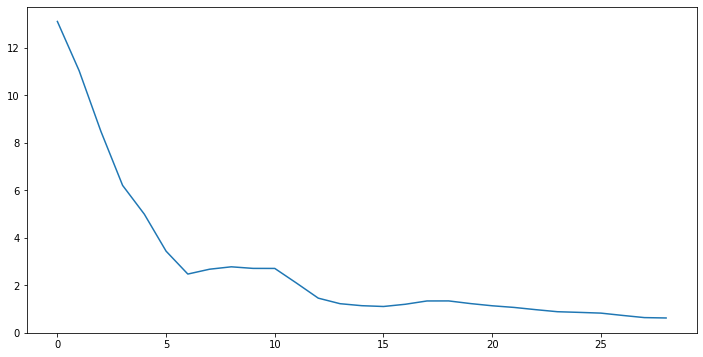

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

# 測試訓練結果

In [ ]:
import random

0.5117685851749504

In [ ]:
lstX = []
lstY = []
lstY1 = []
for i in range(100):
  x1=random.uniform(0, 1)
  x2=random.randint(-100, 100)/100
  x3=random.randint(-100, 100)/100
  y = 2*x1*x1 + 5*x2*x2*x2 + 6*x3
  lstY.append(y)
  
  lstX = [[x1, x2, x3]]
  tensorX = torch.FloatTensor(lstX).to(device)
  tensorY1 = MyNet(tensorX)
  lstY1.append(float(tensorY1))

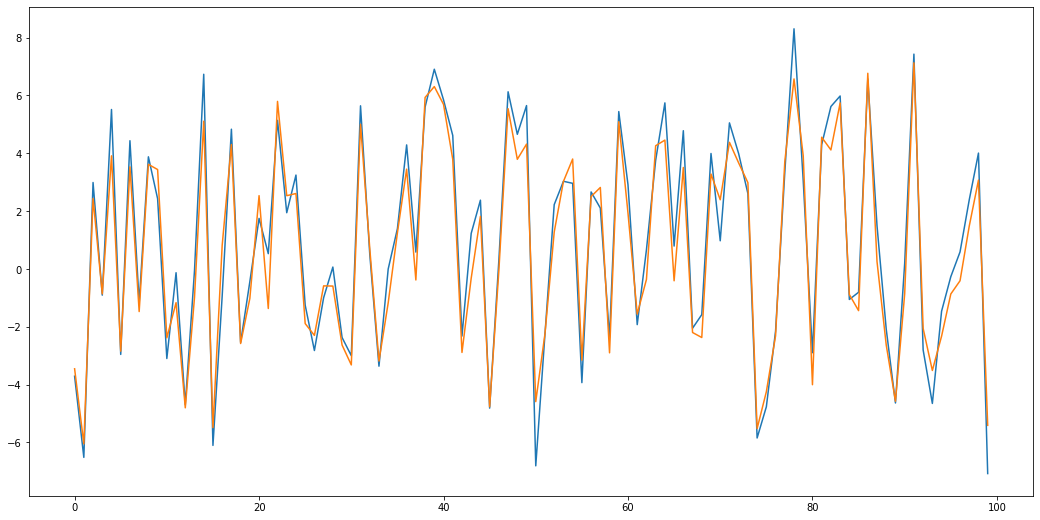

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(lstY)
plt.plot(lstY1)
plt.show()